In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# For dataset visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# To set matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess function
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Deep Learning libraraies
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

# CNN layers
from tensorflow.keras.layers import Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [ ]:
#Tensorboard Things

%load_ext tensorboard
import tensorflow as tf
import datetime, os


In [ ]:
#Importing Image Dataset

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#To unzip google drive file

In [ ]:
fid = drive.ListFile({'q':"title='cervicaldata.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('cervicaldata.zip')

In [ ]:
!unzip cervicaldata.zip

Archive:  cervicaldata.zip
   creating: Dyskeratotic/
  inflating: Dyskeratotic/001_01.bmp  
  inflating: Dyskeratotic/001_02.bmp  
  inflating: Dyskeratotic/001_03.bmp  
  inflating: Dyskeratotic/001_04.bmp  
  inflating: Dyskeratotic/001_05.bmp  
  inflating: Dyskeratotic/002_01.bmp  
  inflating: Dyskeratotic/002_02.bmp  
  inflating: Dyskeratotic/002_03.bmp  
  inflating: Dyskeratotic/002_04.bmp  
  inflating: Dyskeratotic/002_05.bmp  
  inflating: Dyskeratotic/002_06.bmp  
  inflating: Dyskeratotic/002_07.bmp  
  inflating: Dyskeratotic/002_08.bmp  
  inflating: Dyskeratotic/002_09.bmp  
  inflating: Dyskeratotic/002_10.bmp  
  inflating: Dyskeratotic/003_01.bmp  
  inflating: Dyskeratotic/003_02.bmp  
  inflating: Dyskeratotic/003_03.bmp  
  inflating: Dyskeratotic/003_04.bmp  
  inflating: Dyskeratotic/003_05.bmp  
  inflating: Dyskeratotic/003_06.bmp  
  inflating: Dyskeratotic/003_07.bmp  
  inflating: Dyskeratotic/003_08.bmp  
  inflating: Dyskeratotic/003_09.bmp  
  inflatin

In [ ]:
#Class function for dataset devision
import os
import numpy as np
import glob
import shutil
class DatasetDivision:
	def __init__(self, root_dir="",output_dir=""):
		self.root_dir = root_dir
		self.output_dir = output_dir
		print("Instance of the class created")
	def printnow(self, new_dir):
		print("Just testing that the method calling is working"+new_dir)
	def divide_dataset(self, root_dir,output_dir):
		self.root_dir =root_dir
		self.output_dir = output_dir
		if os.path.exists(self.output_dir):
			if not os.path.exists(os.path.join(self.output_dir,'train')):
				os.mkdir(os.path.join(self.output_dir,'train'))
				os.mkdir(os.path.join(self.output_dir,'val'))
				os.mkdir(os.path.join(self.output_dir,'test'))
		else:
			os.mkdir(self.output_dir)
			os.mkdir(os.path.join(self.output_dir,'train'))
			os.mkdir(os.path.join(self.output_dir, 'val'))
			os.mkdir(os.path.join(self.output_dir, 'test'))
		# Split train/val/test sets
		for file in os.listdir(root_dir):
			classes_path = os.path.join(root_dir, file)
			class_files = [name for name in glob.glob(os.path.join(classes_path,'*.bmp'))]
			train_and_valid, test = train_test_split(class_files, test_size=0.1, random_state=42)  #Test dataset will e the 10% of the dataset#
			train, val = train_test_split(train_and_valid, test_size=0.11, random_state=42)  #Validation dataset will be 10% of it , leaving 80% for training #

			#Define the training, validation and testing directories that the frame folders will be moved to.
			train_dir = os.path.join(self.output_dir, 'train',file)
			val_dir = os.path.join(self.output_dir, 'val', file)
			test_dir = os.path.join(self.output_dir, 'test',file)
			if not os.path.exists(train_dir):
				os.mkdir(train_dir)
			if not os.path.exists(val_dir):
				os.mkdir(val_dir)
			if not os.path.exists(test_dir):
				os.mkdir(test_dir)

			for frame_folders in train:
				#get only the last directory of the path frame_folders
				frame_folder = os.path.join(root_dir,file,frame_folders)
				shutil.move(frame_folder,train_dir)
			for frame_folders in val:
				frame_folder = os.path.join(root_dir,file,frame_folders)
				shutil.move(frame_folder,val_dir)
			for frame_folders in test:
				frame_folder = os.path.join(root_dir,file,frame_folders)
				shutil.move(frame_folder,test_dir)
			print('Dataset Division finished.')

In [ ]:
#Defining path & output directory
path_dir= "/content/sipakmed/"
output_dir = "/content/sipakmedFormat"
datasetdiv1 = DatasetDivision(path_dir,output_dir)
datasetdiv1.printnow("The new guy")
datasetdiv1.divide_dataset(path_dir, output_dir)

Instance of the class created
Just testing that the method calling is workingThe new guy
Dataset Division finished.
Dataset Division finished.
Dataset Division finished.
Dataset Division finished.
Dataset Division finished.


In [ ]:
pip install git+https://github.com/aleju/imgaug.git

  Cloning https://github.com/aleju/imgaug.git to /tmp/pip-req-build-1r2hzd6a
  Running command git clone -q https://github.com/aleju/imgaug.git /tmp/pip-req-build-1r2hzd6a
  Created wheel for imgaug: filename=imgaug-0.4.0-cp36-none-any.whl size=971107 sha256=120fdd81617270b1a22e02f944e6b9f97bdb77a78b218829820be43ea47c1411
  Stored in directory: /tmp/pip-ephem-wheel-cache-_l36kx8w/wheels/65/3d/94/ee32cbeaa29c473a4db74c2d21904ac747311fdca4732665f0
Successfully built imgaug
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.4.0 which is incompatible.
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [ ]:
#Creating data augmentation class
import  cv2
import imgaug
import imageio
import os
import numpy as np
from imgaug import augmenters as iaa
class DataAugmentation:
	def __init__(self, root_dir="",output_dir=""):
		self.root_dir = root_dir
		self.output_dir = output_dir
		print("Instance of the DataAugmentation class created")
	def augmentation_of_image(self, test_image, output_path):
		self.test_image = test_image;
		self.output_path = output_path;
		#define the Augmenters
		# Affine transformations
		rotate = iaa.Affine(rotate=(-90,90));
		scale = iaa.Affine(scale={"x": (0.5, 0.9), "y": (0.5,0.9)});
		translation = iaa.Affine(translate_percent={"x": (-0.15, 0.15), "y": (-0.15, 0.15)});
		shear = iaa.Affine(shear=(-2, 2)); #plagio parallhlogrammo wihthin a range (-8,8)
		zoom = iaa.PerspectiveTransform(scale=(0.01, 0.15), keep_size=True) # do not change the output size of the image
		h_flip = iaa.Fliplr(1.0); # flip horizontally all images (100%)
		v_flip = iaa.Flipud(1.0); #flip vertically all images
		padding=iaa.KeepSizeByResize(iaa.CropAndPad(percent=(0.05, 0.25)))#positive values correspond to padding 5%-25% of the image,but keeping the origial output size of the new image

		#Augmentations
		blur = iaa.GaussianBlur(sigma=(0, 1.22))
		contrast = iaa.contrast.LinearContrast((0.75, 1.5));
		contrast_channels = iaa.LinearContrast((0.75, 1.5), per_channel=True)
		sharpen = iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5));
		gauss_noise = iaa.AdditiveGaussianNoise(scale=0.111*255, per_channel=True)
		laplace_noise = iaa.AdditiveLaplaceNoise(scale=(0, 0.111*255))


		#Brightness
		brightness = iaa.Multiply((0.35,1.65)) #change brightness between 35% or 165% of the original image
		brightness_channels = iaa.Multiply((0.5, 1.5), per_channel=0.75) # change birghtness for 25% of images.For the remaining 75%, change it, but also channel-wise.

		#CHANNELS (RGB)=(Red,Green,Blue)
		red =iaa.WithChannels(0, iaa.Add((10, 100))) #increase each Red-pixels value within the range 10-100
		red_rot = iaa.WithChannels(0,iaa.Affine(rotate=(0, 45))) #rotate each image's red channel by 0-45 degrees
		green= iaa.WithChannels(1, iaa.Add((10, 100)))#increase each Green-pixels value within the range 10-100
		green_rot=iaa.WithChannels(1,iaa.Affine(rotate=(0, 45))) #rotate each image's green channel by 0-45 degrees
		blue=iaa.WithChannels(2, iaa.Add((10, 100)))#increase each Blue-pixels value within the range 10-100
		blue_rot=iaa.WithChannels(2,iaa.Affine(rotate=(0, 45))) #rotate each image's blue channel by 0-45 degrees

		#colors
		channel_shuffle =iaa.ChannelShuffle(1.0); #shuffle all images of the batch
		grayscale = iaa.Grayscale(1.0)
		hue_n_saturation = iaa.MultiplyHueAndSaturation((0.5, 1.5), per_channel=True) #change hue and saturation with this range of values for different values
		add_hue_saturation = iaa.AddToHueAndSaturation((-50, 50), per_channel=True) #add more hue and saturation to its pixels
		#Quantize colors using k-Means clustering
		kmeans_color = iaa.KMeansColorQuantization(n_colors=(4, 16)) #quantizes to k means 4 to 16 colors (randomly chosen). Quantizes colors up to 16 colors

		#Alpha Blending
		blend =iaa.AlphaElementwise((0, 1.0), iaa.Grayscale((0,1.0))) ; #blend depending on which value is greater

		#Augmentors
		clahe = iaa.CLAHE(tile_grid_size_px=((3, 21),[0,2,3,4,5,6,7])) #create a clahe contrast augmentor H=(3,21) and W=(0,7)
		histogram = iaa.HistogramEqualization() #performs histogram equalization
		OneofRed = iaa.OneOf( [red]);
		OneofGreen = iaa.OneOf( [green] );
		OneofBlue = iaa.OneOf( [blue]);
		contrast_n_shit = iaa.OneOf([contrast, brightness, brightness_channels]);
		SomeAug = iaa.SomeOf(2,[rotate,scale, translation, shear, h_flip,v_flip],random_order=True);
		SomeClahe = iaa.SomeOf(2, [clahe, iaa.CLAHE(clip_limit=(1, 10)),iaa.CLAHE(tile_grid_size_px=(3, 21)),iaa.GammaContrast((0.5, 2.0)), iaa.AllChannelsCLAHE() , iaa.AllChannelsCLAHE(clip_limit=(1, 10), per_channel=True)],random_order=True) #Random selection from clahe augmentors
		edgedetection= iaa.OneOf([iaa.EdgeDetect(alpha=(0, 0.7)),iaa.DirectedEdgeDetect(alpha=(0, 0.7), direction=(0.0, 1.0))]);
		canny_filter = iaa.OneOf([iaa.Canny(), iaa.Canny(alpha=(0.5, 1.0), sobel_kernel_size=[3, 7])]); #choose one of the 2 canny filter options
		OneofNoise = iaa.OneOf([blur, gauss_noise, laplace_noise])
		Color_1 = iaa.OneOf([channel_shuffle,grayscale, hue_n_saturation , add_hue_saturation, kmeans_color]);
		Color_2 = iaa.OneOf([channel_shuffle,grayscale, hue_n_saturation , add_hue_saturation, kmeans_color]);
		Flip = iaa.OneOf([histogram , v_flip, h_flip]);

		#Define the augmentors used in the DA
		Augmentors= [SomeAug, SomeClahe, edgedetection, canny_filter, Color_1, contrast_n_shit]


		for i in range(0,6):
			img = cv2.imread(test_image) #read you image
			images = np.array([img for _ in range(6)], dtype=np.uint8)
			images_aug = Augmentors[i].augment_images(images)
			cv2.imwrite(os.path.join(output_path,test_image +"new"+str(i)+'.jpg'), images_aug[i])

In [ ]:
import shutil
#import library from the python file
class DataAugmentation_Extension:

	def __init__(self, directory=""):
		self.directory = directory
		print("Instance of DataAugmentation_Extension class created")

	def printnow(self, dir):
		print("Just testing that the method calling is working "+ dir)


	def extend_dataset(self,directory):
		#Create an instance of class
		print("HEY")
		library_augment= DataAugmentation();
		self.directory = directory
		if not os.path.exists(self.directory):
			print("ERROR! Couldn't find directory!")
		else:
			print("Directory exists")
		for file in os.listdir(directory):            #for any file inside the root directory
			classes_path = os.path.join(directory, file)  #So for every folder class we create a class directory
			class_files = [name for name in glob.glob(os.path.join(classes_path,'*.bmp'))]  #alternatively we can use the globe as mentioned
			print(class_files); #call augmentation for all class_files
			for i in range(len(class_files)):
				library_augment.augmentation_of_image(class_files[i], classes_path)

In [ ]:
#data augmentation
#directories
target_directory = "/content/sipakmedFormat/train"
datasetda = DataAugmentation_Extension()
datasetda.extend_dataset(target_directory)

Instance of DataAugmentation_Extension class created
HEY
Instance of the DataAugmentation class created
Directory exists
['/content/sipakmedFormat/train/Parabasal/100_04.bmp', '/content/sipakmedFormat/train/Parabasal/060_01.bmp', '/content/sipakmedFormat/train/Parabasal/089_09.bmp', '/content/sipakmedFormat/train/Parabasal/085_01.bmp', '/content/sipakmedFormat/train/Parabasal/013_02.bmp', '/content/sipakmedFormat/train/Parabasal/095_04.bmp', '/content/sipakmedFormat/train/Parabasal/011_03.bmp', '/content/sipakmedFormat/train/Parabasal/093_01.bmp', '/content/sipakmedFormat/train/Parabasal/064_05.bmp', '/content/sipakmedFormat/train/Parabasal/065_06.bmp', '/content/sipakmedFormat/train/Parabasal/016_11.bmp', '/content/sipakmedFormat/train/Parabasal/044_09.bmp', '/content/sipakmedFormat/train/Parabasal/099_07.bmp', '/content/sipakmedFormat/train/Parabasal/047_09.bmp', '/content/sipakmedFormat/train/Parabasal/011_05.bmp', '/content/sipakmedFormat/train/Parabasal/056_01.bmp', '/content/sipa

In [ ]:
import numpy as np
from keras.layers import Dense, GlobalMaxPool2D, BatchNormalization, Dropout
from keras.applications import VGG19
from keras.models import Model, Sequential

base_model = VGG19(weights='imagenet', include_top=False)
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

80142336/80134624 [==============================] - 3s 0us/step
0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_conv4
11 block3_pool
12 block4_conv1
13 block4_conv2
14 block4_conv3
15 block4_conv4
16 block4_pool
17 block5_conv1
18 block5_conv2
19 block5_conv3
20 block5_conv4
21 block5_pool


In [ ]:
### MODELS
import numpy as np
from keras.layers import Dense, GlobalMaxPool2D, BatchNormalization, Dropout
from keras.applications import VGG19
from keras.models import Model, Sequential
"""
Create a new feature extractor based on the pretrained VGG19 model:
The model is frozen from the bottom layer to activation layer 24.
Activation layer 17 is then pooled with GlobalMaxPool2D, connected to a
Dense layer with 1024 neurons, and then to the softmax layer.
"""
def VGG(seed = None):
    np.random.seed(seed)
    vgg19 = VGG19(weights="imagenet", include_top=False)
    for layer in vgg19.layers[:17]:
        layer.trainable = False
    for layer in vgg19.layers[17:]:
        layer.trainable = True
    y = (vgg19.get_layer("block5_conv2")).output
    mx_y = GlobalMaxPool2D()(y)
    x = BatchNormalization()(mx_y)
    x = Dropout(.5)(x)
    x = Dense(1024, activation='relu', name="dense_1024")(x)
    x = BatchNormalization()(x)
    x = Dropout(.5)(x)
    preds = Dense(5,activation='softmax')(x)
    model = Model(inputs=vgg19.input, outputs=preds)
    return model

In [2]:
import numpy as np
from keras.layers import Dense, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

"""LOAD DATA"""
# path to folder with data
path = "/content/sipakmedFormat/"

train_datagen = ImageDataGenerator(featurewise_center=False,
                                   rotation_range = 5, fill_mode="nearest",
                                   zoom_range=[1/1.0, 1/1.0], width_shift_range=0.0, height_shift_range=0.0,
                                   horizontal_flip = True, vertical_flip=True,
                                   brightness_range=[0.5, 1.3], channel_shift_range=20)

no_DA_IDG = ImageDataGenerator()

# in training set: use data augmentation image data generator, for validation and test: no data augmentation.
training_set = train_datagen.flow_from_directory(path+"train/",
                                                target_size=(224, 224), # typical imagenet dimensions
                                                color_mode='rgb',
                                                batch_size=32,
                                                class_mode='categorical', shuffle=True)



validation_set =  no_DA_IDG.flow_from_directory(path+"val/",
                                                target_size=(224, 224),
                                                color_mode='rgb',
                                                class_mode='categorical',
                                                shuffle=True)



test_set_V2 = no_DA_IDG.flow_from_directory(path+"test/",
                                                target_size=(224, 224),
                                                color_mode='rgb',
                                                batch_size=1,
                                                class_mode='categorical',
                                                shuffle=False)


"""CREATE & TRAIN MODELS"""

model_vgg = VGG()

""" The model was trained with a Adam with a learning rate of 1e-3 for 50 epochs.
Then the training was continued for 50 epochs at a lower learning
rate."""

epochs = 30
opt = Adam(learning_rate=1e-3)
model_vgg.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])
model_vgg.fit_generator(generator=training_set, epochs=epochs, validation_data=validation_set, verbose=2)

opt = Adam(learning_rate=1e-5)
model_vgg.fit_generator(generator=training_set, epochs=epochs, validation_data=validation_set, verbose=2)

# save model weights
model_vgg.save_weights("K_VGG19_T2.h5")

"""EVALUATE PERFORMANCE ON THE TEST SET"""

y_test = test_set_V2.classes
pred = np.argmax(model_vgg.predict_generator(test_set_V2, steps = test_set_V2.n), axis=1)
accuracy = accuracy_score(y_test, pred)
print("{:.4f}".format(accuracy))

 Found 14884 images belonging to 5 classes.
 Found 1861 images belonging to 5 classes.
 Found 1860 images belonging to 5 classes.
 94773248/94765736 [==============================] - 1s 0us/step
 Instructions for updating:
 Please use Model.fit, which supports generators.
 Epoch 1/30
 165/165 - 66s - loss: 0.8945 - acc: 0.8447 - val_loss: 0.2535 - val_acc: 0.8845
 Epoch 2/30
 165/165 - 64s - loss: 0.5603 - acc: 0.8755 - val_loss: 0.2026 - val_acc: 0.9166
 Epoch 3/30
 165/165 - 68s - loss: 0.4629 - acc: 0.8373 - val_loss: 0.2158 - val_acc: 0.9334
 Epoch 4/30
 165/165 - 67s - loss: 0.4402 - acc: 0.8479 - val_loss: 0.2302 - val_acc: 0.9191
 Epoch 5/30
 165/165 - 68s - loss: 0.4130 - acc: 0.8589 - val_loss: 0.1741 - val_acc: 0.9291
 Epoch 6/30
 165/165 - 69s - loss: 0.3886 - acc: 0.8644 - val_loss: 0.2266 - val_acc: 0.9254
 Epoch 7/30
 165/165 - 67s - loss: 0.3733 - acc: 0.8699 - val_loss: 0.2271 - val_acc: 0.9247
 Epoch 8/30
 165/165 - 65s - loss: 0.3529 - acc: 0.8738 - val_loss: 0.2363 

In [1]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  import matplotlib.pyplot as plt
  import numpy as np
  import itertools

  accuracy = np.trace(cm) / float(np.sum(cm))
  misclass = 1 - accuracy

  if cmap is None:
      cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(8, 6))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  if target_names is not None:
      tick_marks = np.arange(len(target_names))
      plt.xticks(tick_marks, target_names, rotation=45)
      plt.yticks(tick_marks, target_names)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


  thresh = cm.max() / 1.5 if normalize else cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      if normalize:
          plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
      else:
          plt.text(j, i, "{:,}".format(cm[i, j]),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")


  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
  plt.show()

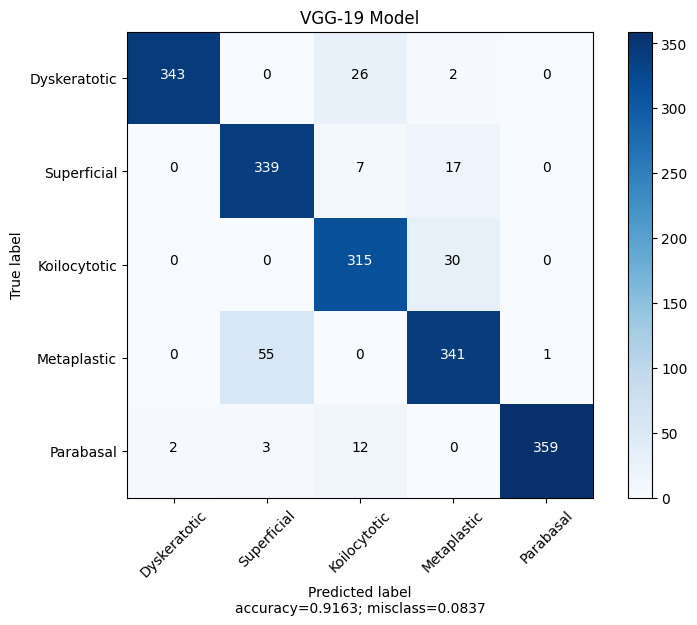

In [2]:
plot_confusion_matrix(cm = confusion_matrix(y_test, pred),
                      normalize    = False,
                      target_names = ['Dyskeratotic', 'Superficial', 'Koilocytotic', 'Metaplastic', 'Parabasal'],
                      title        = "VGG-19 Model")

In [ ]:
from google.colab import files
files.download("/content/model_vgg19.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>